In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
import cv2
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import random
import matplotlib.pyplot as plt

In [2]:
xt = np.load("Dados/Xtrain_Classification2.npy") 
yt = np.load("Dados/ytrain_Classification2.npy")
xScaled =  (xt).astype('float32')/255.0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.25, shuffle=True, random_state=10, stratify=yt)

In [4]:
# y_tr = np.argmax(y_train)
count = np.zeros(6)
for i in y_train.astype('int'):
    count[i]+=1
count

array([4021.,  668.,   87., 1729.,  742.,  724.])

In [5]:
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
addx = np.array([])
addy = np.array([]) 
for idx, i in enumerate(y_train):
        a = random.uniform(0, 1)
        if a > 1:
            for l in range(3):
                if l == 0:
                    if not np.any(addx):
                        addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                        addy = np.append(addy,i)
                    else:
                        aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                        addx = np.append(addx,aux,axis=0)
                        addy = np.append(addy,i)
                    
                elif l == 1:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                
                elif l == 2:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)

# X_trainrs = np.append(X_trainrs,addx,axis=0) 
# y_train = np.append(y_train,addy)

In [6]:
X_trainrs = X_trainrs.reshape(-1, 28*28*3)
rus = RandomUnderSampler(sampling_strategy={0: 600, 1:600, 3:600, 4:600, 5:600})
X_trainrs, y_train = rus.fit_resample(X_trainrs, y_train)  
oversample = RandomOverSampler()
X_trainrs, y_train = oversample.fit_resample(X_trainrs, y_train)
X_trainrs = X_trainrs.reshape(-1, 28,28,3)
np.save("Dados2/Xtreino2.npy", X_trainrs)
np.save("Dados2/ytreino2.npy", y_train)
np.save("Dados2/Xteste2.npy", X_testrs)
np.save("Dados2/yteste2.npy", y_test)
# y_tr = np.argmax(y_train)
count = np.zeros(6)
for i in y_train.astype('int'):
    count[i]+=1
count

array([600., 600., 600., 600., 600., 600.])

In [7]:
# X_trainrs = np.load("Dados2/Xtreino2.npy")
# y_train=np.load("Dados2/ytreino2.npy")
# X_testrs=np.load("Dados2/Xteste2.npy")
# y_test=np.load("Dados2/yteste2.npy")

In [7]:
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['poly', 'rbf'], 
    'gamma': [0.001, 0.01, 0.1, 1] 
}

In [8]:
grid_search = GridSearchCV(svm, param_grid, cv=5,  n_jobs=-1, scoring='balanced_accuracy')
grid_search.fit(X_trainrs.reshape(-1,28*28*3), y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['poly', 'rbf']})

In [11]:
grid_search.best_params_, grid_search.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8319444444444445)

In [13]:
# Make predictions on the test data
y_pred = grid_search.predict(X_testrs.reshape(-1,28*28*3))

# Calculate and print the accuracy of the classifier
print("Balanced ACC SVC->", balanced_accuracy_score(y_test, y_pred))

Balanced ACC SVC-> 0.8212912328850447


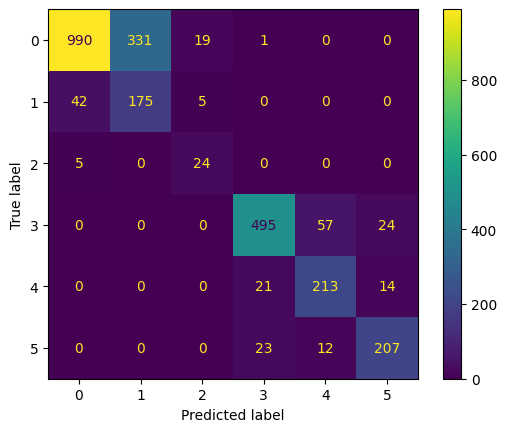

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5])
disp.plot()
plt.show()